<a href="https://colab.research.google.com/github/Umarfarook1/churn_prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib
import matplotlib.pyplot as plt
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


Accuracy: 0.8048261178140526
Precision: 0.6678082191780822
Recall: 0.5227882037533512
F1-score: 0.5864661654135338


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


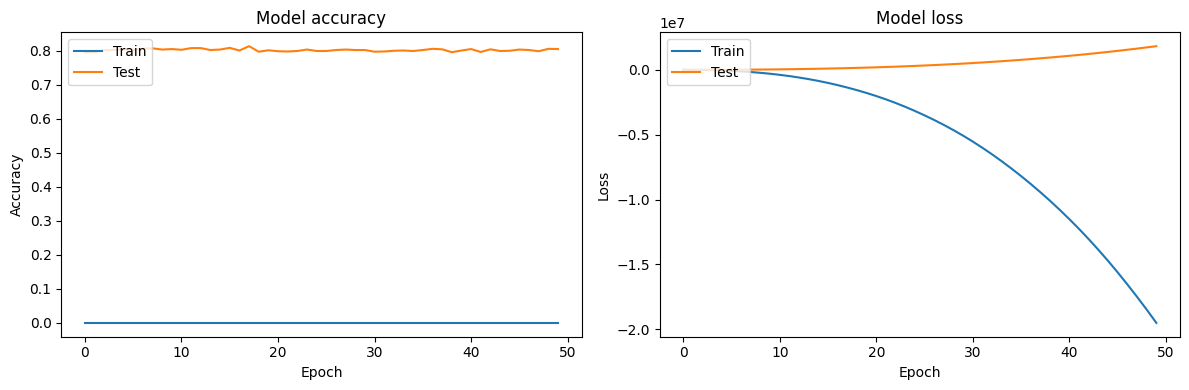

In [ ]:

# Step 1: Data Preparation
def load_data(url):
    return pd.read_csv(url)

def preprocess_data(data):
    data = data.dropna()
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])
    scaler = StandardScaler()
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
    X = data.drop(columns=['Churn'])
    y = data['Churn']
    return X, y, label_encoders, scaler

def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the Neural Network
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Main script execution
if __name__ == "__main__":
    # Load and preprocess data
    url = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
    data = load_data(url)
    X, y, label_encoders, scaler = preprocess_data(data)

    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Ensure y_test is binary
    y_test = y_test.astype(int)

    # Build and train model
    model = build_model(X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert to binary and flatten

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

    # Save the model and preprocessing objects
    model.save('customer_churn_model.h5')
    joblib.dump(label_encoders, 'label_encoders.pkl')
    joblib.dump(scaler, 'scaler.pkl')

    # Plotting the training history
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()
